# Day 09. Exercise 02
# Metrics

## 0. Imports

In [257]:
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [10]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [10]:
svm = SVC(kernel='rbf', C=10, gamma='auto', class_weight=None, random_state=21, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [268]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=21, class_weight='balanced', random_state=21)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_score = tree.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.89053
precision is 0.89402
recall is 0.89053
roc_auc is 0.93793


## 4. Random forest

1. The same task for random forest.

In [15]:
forest = RandomForestClassifier(n_estimators=100, max_depth=24, criterion='entropy', class_weight='balanced', random_state=21)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_score = forest.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.92604
precision is 0.92754
recall is 0.92604
roc_auc is 0.98939


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [186]:
forest = RandomForestClassifier(n_estimators=100, max_depth=24, criterion='entropy', class_weight='balanced', random_state=21)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

df = pd.merge(X_test, y_test, left_index=True, right_index=True)
df['prediction'] = y_pred
df.head()

joblib.dump(forest, '../data/model_2.pkl')

['model_2.pkl']

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.98      0.95      0.96        55
           2       0.97      0.93      0.95        30
           3       0.96      0.97      0.97        80
           4       1.00      0.86      0.92        21
           5       0.84      0.91      0.88        54
           6       0.91      0.97      0.94        71

    accuracy                           0.93       338
   macro avg       0.94      0.91      0.92       338
weighted avg       0.93      0.93      0.93       338



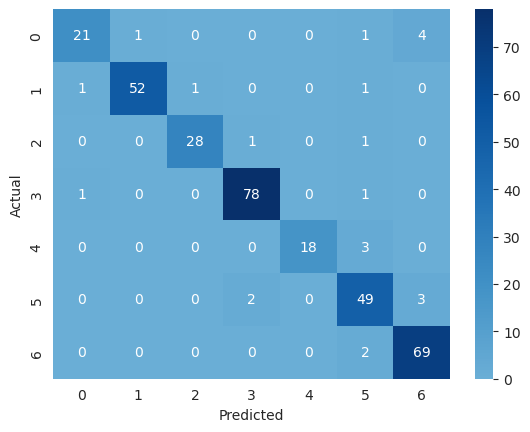

In [183]:
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', center=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [251]:
def show_most_errors(name):
    columns_to_select = df.columns.str.contains(name)
    selected_columns = df.columns[columns_to_select]
    df['is_correct'] = df['prediction'] == df['dayofweek']
    
    name_df = pd.merge(df[selected_columns], df[['is_correct']], left_index=True, right_index=True)
    
    grouped = name_df.groupby('is_correct').sum()
    
    count = name_df.shape[0]
    
    # grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=0).fillna(0)
    grouped = grouped.apply(lambda x: x / count * 100).fillna(0)
    grouped = grouped[grouped.index == False]

    
    plt.figure(figsize=(10,8))
    plt.title(f"Процент ошибок по {name}")
    plt.barh(grouped.columns, grouped.values.ravel(), color='blue')
    plt.xlabel('Errors %')
    
    plt.show()

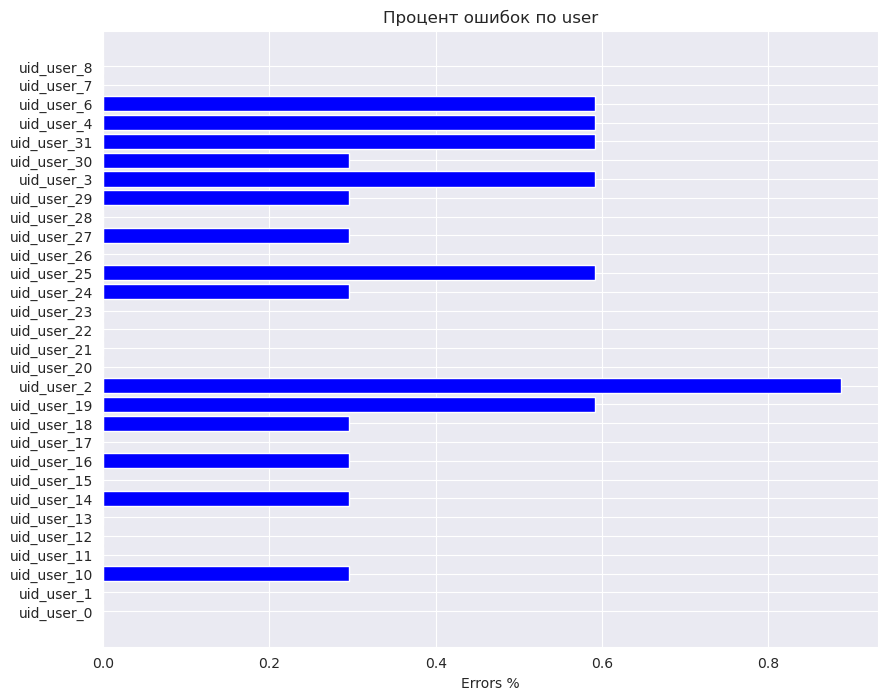

In [252]:
show_most_errors('user')

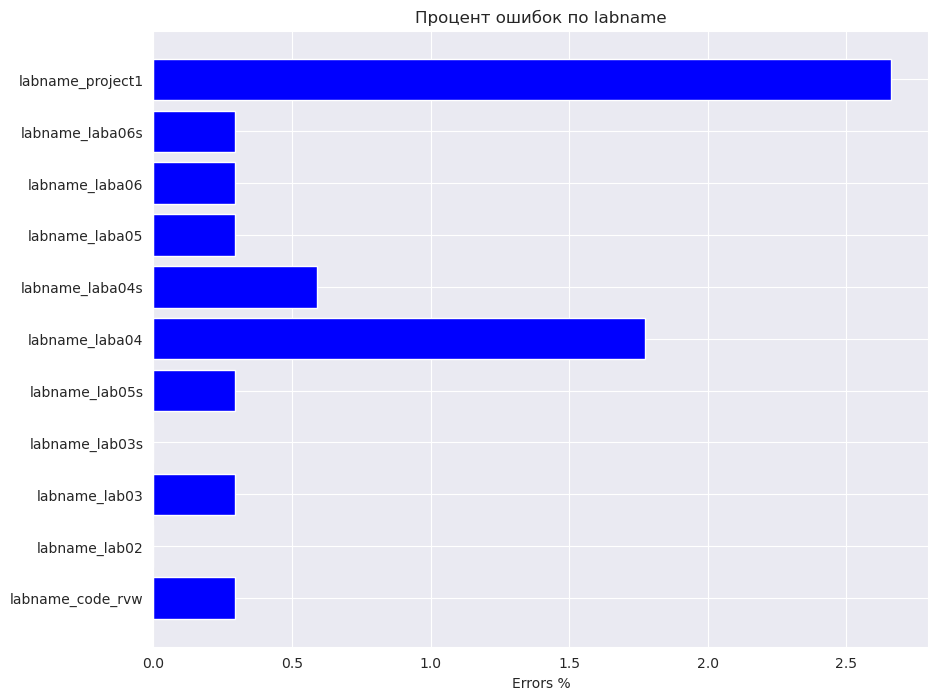

In [253]:
show_most_errors('labname')

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [261]:
def show_metrics(model):
    data = {}
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    data['accuracy'] = accuracy_score(y_test, y_pred)
    data['precision'] = precision_score(y_test, y_pred, average='weighted')
    data['recall'] = recall_score(y_test, y_pred, average='weighted')
    data['roc_auc'] = roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')
    return data

In [269]:
show_metrics(svm)

{'accuracy': 0.8875739644970414,
 'precision': 0.8926729169690374,
 'recall': 0.8875739644970414,
 'roc_auc': 0.9787793228216216}

In [270]:
show_metrics(tree)

{'accuracy': 0.8905325443786982,
 'precision': 0.8940158937843722,
 'recall': 0.8905325443786982,
 'roc_auc': 0.9379290651156622}

In [265]:
show_metrics(forest)

{'accuracy': 0.9319526627218935,
 'precision': 0.9340183677910212,
 'recall': 0.9319526627218935,
 'roc_auc': 0.9882077759075321}